In [5]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import root, newton

In [24]:
g = 9.81
def iter(t, k, v, phi):
    return (k*v*np.sin(phi)+g)/k**2 * (1 - np.exp(-k*t)) - g/k * t

def iter_ableitung(t, k, v, phi):
    return v*np.sin(phi)*np.exp(-k*t) - g/k * (1-np.exp(-k*t))

def so_weit_bin_ich_gekommen(t, k, v, phi):
    return (v * np.cos(phi)) / k * (1 - np.exp(-k*t))

def newton_zweite_NST(phi, k, v, eps):
    c = 1 + (v*k*np.sin(phi))/g
    t0 = (1/k * np.log(c)) * 2
    while True:
        t_davor = t0
        t0 = t0 - iter(t0, k, v, phi) / iter_ableitung(t0, k, v, phi)
        if np.abs(t_davor - t0) < eps:
            return t0

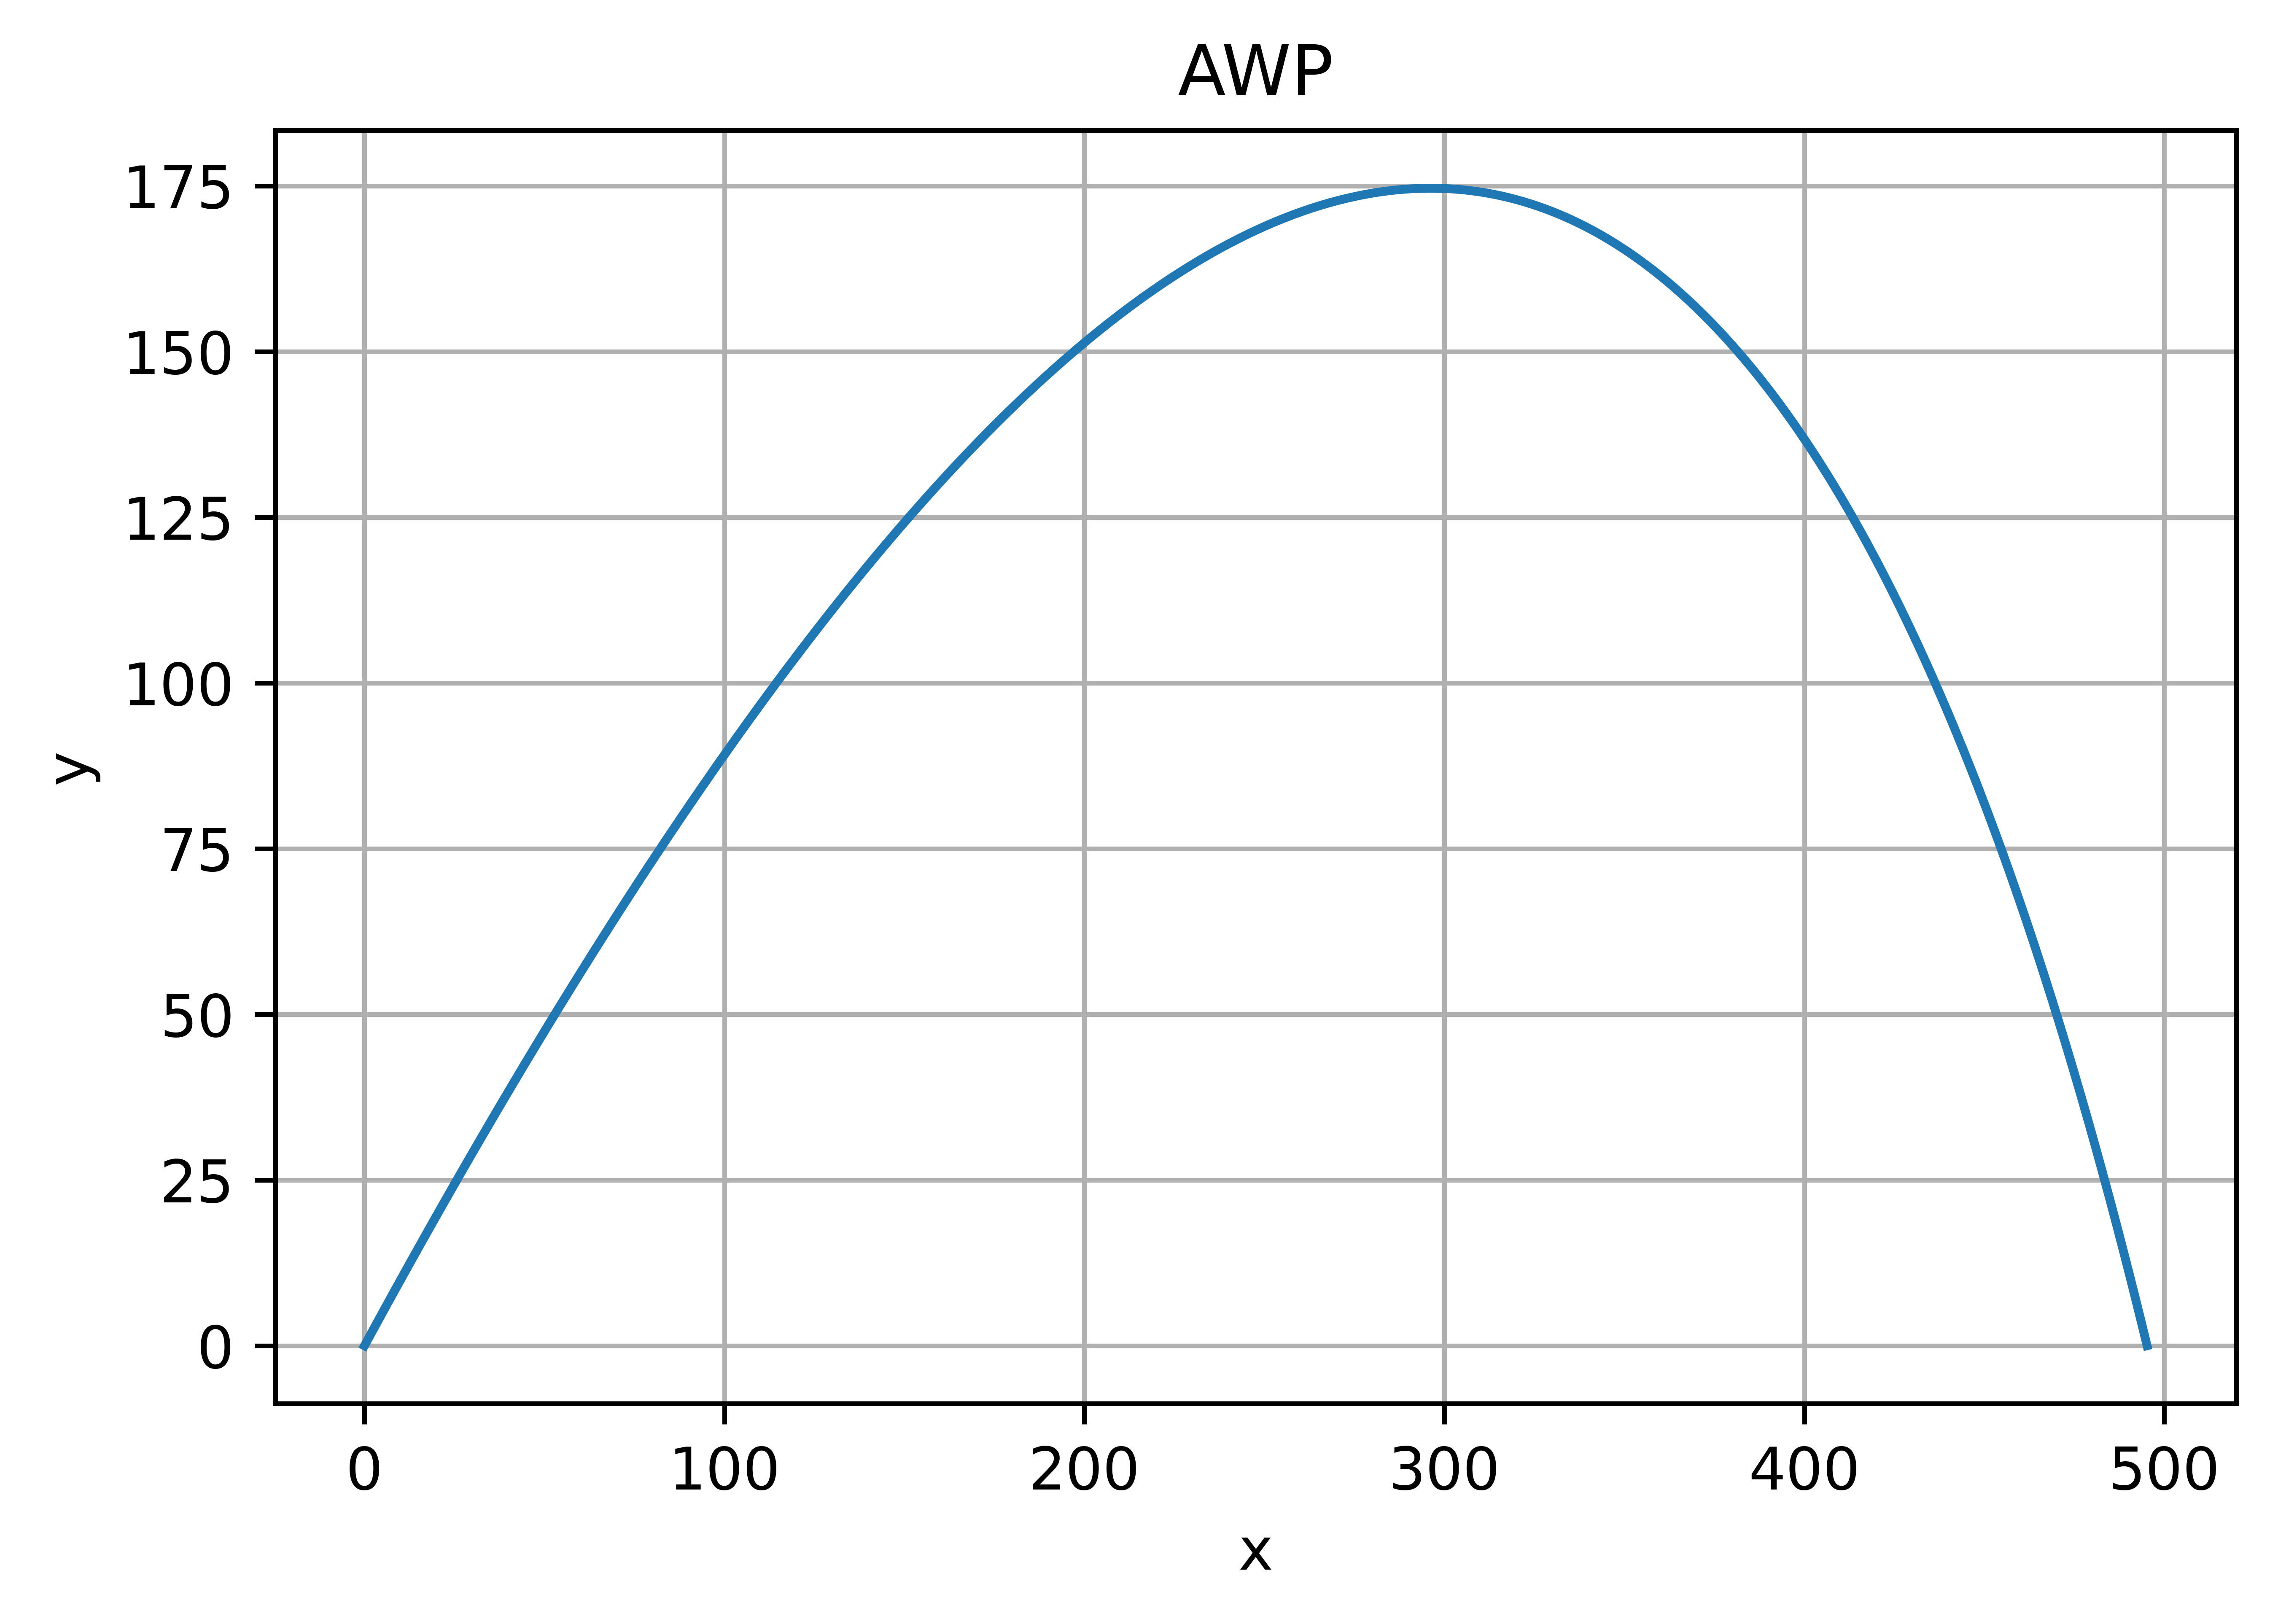

In [26]:
init_phi = np.pi / 4
init_k = 0.1
init_v = 100

c = 1 + (v*init_k*np.sin(init_phi))/g
t0 = 1/init_k * np.log(c)
t0 += t0 / 2
t = np.linspace(0, newton_zweite_NST(init_phi, init_k, init_v, 10**-10), 1000)
plt.figure(dpi=1000)
plt.plot(so_weit_bin_ich_gekommen(t, init_k, init_v, init_phi), iter(t, init_k, init_v, init_phi))
plt.title('AWP')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()